# 2 Statistical Learning
### Exercises

## Conceptual

1. For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.  
(a) The sample size n is extremely large, and the number of predictors p is small.  
(b) The number of predictors p is extremely large, and the number
of observations n is small.  
(c) The relationship between the predictors and response is highly
non-linear.  
(d) The variance of the error terms, i.e. $\sigma^2$ = Var( $\epsilon$ ), is extremely
high.  
**Answer**:  
(a) - Flexible method will perform better, since the model will be able to arrive to a better estimation of *f* due to the large *n*.
(b) - Inflexible method will perform better, since the number of *n* is small.
(c) - Flexible methods will perform better, since they are better at describing non-linearity.
(d) - Inflexible methods will be better, since the flesible model is overfitting.  

2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.  
(a) We collect a set of data on the top 500 firms in the US. For each
firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors
affect CEO salary.  
(b) We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each prod-
uct we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price,
and ten other variables.  
(c) We are interest ed in predicting the % change in the USD/Euro
exchange rate in relation to the weekly changes in the world
stock markets. Hence we collect weekly data for all of 2012. For
each week we record the % change in the USD/Euro, the %
change in the US market, the % change in the British market,
and the % change in the German market.  
**Answer**  
(a) Regression, Inference, n=500, p=3  
(b) Classification, Prediction, n=20, p=13  
(c) Regression, Prediction, n=52, p=4  

3. We now revisit the bias-variance decomposition.  
(a) Provide a sketch of typical (squared) bias, variance, training er-
ror, test error, and Bayes (or irreducible) error curves, on a sin-
gle plot, as we go from less flexible statistical learning methods
towards more flexible approaches. The x-axis should represent
the amount of flexibility in the method, and the y-axis should
represent the values for each curve. There should be five curves.
Make sure to label each one.  
(b) Explain why each of the five curves has the shape displayed in
part (a).  
**Answer**  
Although I made a sketch on a piece of paper, its to ugly to show... The point of the exercise is to arrive to the Bias-Variance trade off between flexible and inflexible models.

4. You will now think of some real-life applications for statistical learn-
ing.  
(a) Describe three real-life applications in which classification might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.  
(b) Describe three real-life applications in which regression might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.  
(c) Describe three real-life applications in which cluster analysis
might be useful.  
**Answer**  
(a)/(b)/(c) - [Here](https://github.com/gsam1/dsml-projects)

5. What are the advantages and disadvantages of a very flexible (versus
a less flexible) approach for regression or classification? Under what
circumstances might a more flexible approach be preferred to a less
flexible approach? When might a less flexible approach be preferred?  
**Answer**  
Very flexible models are useful when our goal is to predict a certain outcome and we are not interested in the underlying dynamics so much. On the other hand less flexible methods allow for more interpretability.  

6. Describe the differences between a parametric and a non-parametric
statistical learning approach. What are the advantages of a para-
metric approach to regression or classification (as opposed to a non-
parametric approach)? What are its disadvantages?  
**Answer**  
Parametetric methods assume the form of *f*, while non-parametric ones do not. Assuming the form of *f* leads to a simplified version of the problem. On the other assuming the form of *f* may lead to poorer estimate.  

7. The table below provides a training data set containing six observa-
tions, three predictors, and one qualitative response variable. (Too lazy to insert a picture from the book).
Suppose we wish to use this data set to make a prediction for Y when
$X_1$ = $X_2$ = $X_3$ = 0 using K-nearest neighbors.  
(a) Compute the Euclidean distance between each observation and
the test point, $X_1$ = $X_2$ = $X_3$ = 0.  
(b) What is our prediction with K = 1? Why?  
(c) What is our prediction with K = 3? Why?  
(d) If the Bayes decision boundary in this problem is highly non-
linear, then would we expect the best value for K to be large or
small? Why?  
**Answer**  
(a) $Distance_1$ = 3, $Distance_2$ = 2, $Distance_3$ = 3.16, $Distance_4$ = 2.23, $Distance_5$ = 1.414, $Distance_6$ = 1.732  
(b) Green - its the closest for 1 neightbor.
(c) Red - the closest observations for 3 neighbors are red.
(d) K should be small as the idea is to increase non-linearity.


## Applied

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

8. The original task is related to R, thats why I will load the datasset, get summary information and plot a scatter, boxplot and a histogram.

In [11]:
#(a)
df = pd.read_csv('./datasets/College.csv')

In [4]:
df.head() # get the head to know with what we are dealing with

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


We see that the college name is in an 'Unnamed' column.

In [23]:
# (b) deal with the college column
df['College'] = df['Unnamed: 0']
del df['Unnamed: 0']

In [24]:
# (c) 
# i.
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


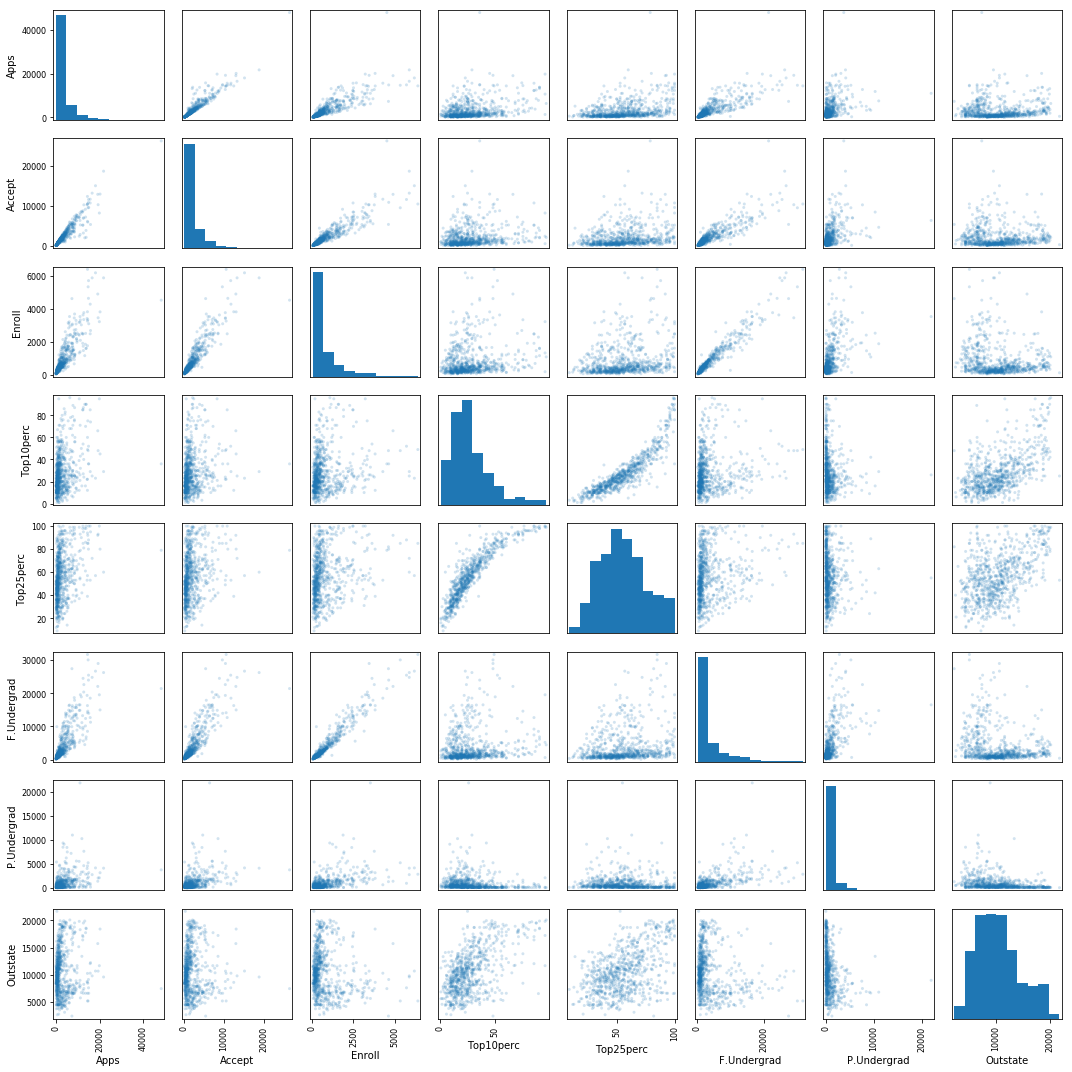

In [30]:
axes = pd.plotting.scatter_matrix(df.iloc[:, 0:9], alpha=0.2, figsize=(15,15))
plt.tight_layout()

[]

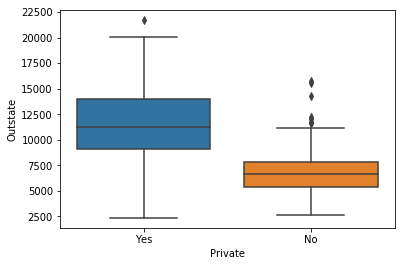

In [33]:
# iii.
sns.boxplot(x='Private', y='Outstate', data=df)
plt.plot()

In [34]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,College
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,Abilene Christian University
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,Adelphi University
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,Adrian College
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Agnes Scott College
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,Alaska Pacific University


In [51]:
# iv.
df['Elite'] = 'No'
df.loc[df['Top10perc'] > 50, 'Elite'] = 'Yes'
df['Elite'] = df['Elite'].astype('category')
# describe doesn't give the info on elite unis
elite_colleges = len(df.loc[df['Elite'] == 'Yes','College'])
elite_colleges

78

[]

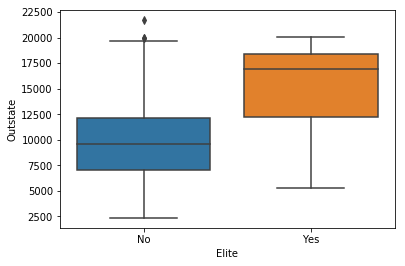

In [52]:
sns.boxplot(x='Elite', y='Outstate', data=df)
plt.plot()

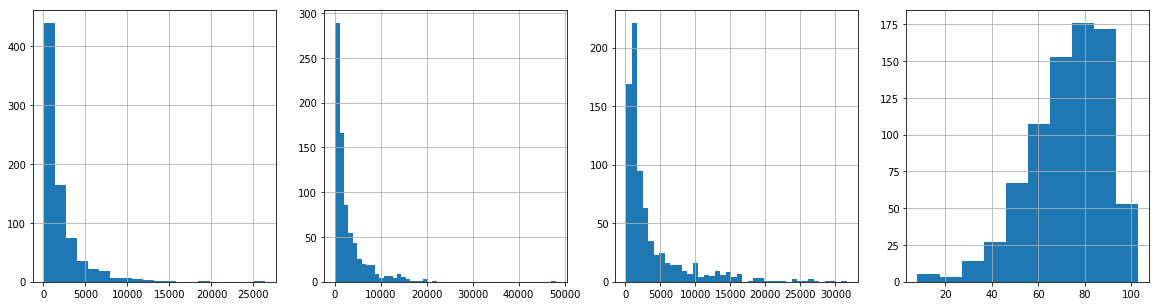

In [67]:
# v.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
df.loc[:,'Accept'].hist(bins=20, ax=axes[0])
df.loc[:,'Apps'].hist(bins=50, ax=axes[1])
df.loc[:,'F.Undergrad'].hist(bins=40, ax=axes[2])
df.loc[:,'PhD'].hist(bins=10, ax=axes[3])

#### 2. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [68]:
auto_df = pd.read_csv('./datasets/Auto.csv')

In [69]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


(a) Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year. Qualitative: origin, name

In [70]:
# (b) this we could get via the describe function. Same goes of (c)
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000
